# Project: Wrangling and Analyze Data

# Table Of Content

1. [Data Gathering](#datagather)
2. [Accessing Data](#accessdata)
   2.2 [Quality Issue](#qissue)
   2.3 [Tidiness Issue](#tissue)
3. [Cleaning Data](#cleandata)
4. [Storing Data](#storedata)
5. [Analyzing and Visualizing Data](#analviz)
   5.5 [Insight](#insight)
   5.6 [Visualization](#viz)
   

## Data Gathering
<a id='datagather'></a>
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

tweets = pd.read_csv('twitter-archive-enhanced.csv')

tweets.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None



2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

# Save the file locally
with open('image-predictions.tsv', 'wb') as f:
    f.write(r.content)
    
pred = pd.read_csv('image-predictions.tsv', sep= '\t')
pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [3]:
import json

# Initialize an empty list
json_data = []

# Iterate over the lines of the file
with open('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        # Load the JSON data and append it to the list
        json_data.append(json.loads(line))



In [4]:
retweets = pd.DataFrame(json_data)

retweets.head(10)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,892420643555336193,892420643555336193,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,892177421306343426,892177421306343426,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,891815181378084864,891815181378084864,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,891689557279858688,891689557279858688,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,891327558926688256,891327558926688256,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,None,None,Sat Jul 29 00:08:17 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20562,False,Here we have a majestic great white breaching ...,None,891087950875897856,891087950875897856,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,3261,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,None,None,Fri Jul 28 16:27:12 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,None,890971913173991426,890971913173991426,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,2158,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,None,None,Fri Jul 28 00:22:40 +0000 2017,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56848,False,When you watch your owner call another dog a g...,None,890729181411237888,890729181411237888,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,16716,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id'

## Assessing Data
<a id='accessdata'></a>
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [5]:
tweets['rating_numerator'].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [6]:
tweets['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [7]:
tweets[['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
5,13,10
6,13,10
7,13,10
8,13,10
9,14,10


In [8]:
tweets['text'].str[-60:]

0       ppears in the hole of a donut. 13/10 https://t...
1       , snugs, boops, the whole bit. 13/10 https://t...
2       ever know when one may strike. 12/10 https://t...
3       eal. 13/10 happens to the best of us https://t...
4       e respected as such. 12/10 #BarkWeek https://t...
5       . 13/10 (IG: tucker_marlo) #BarkWeek https://t...
6       cking below\n\nhttps://t.co/Zr4hWfAs1H https:/...
7       ou and say you're a great boy. 13/10 https://t...
8       ly pettable boatpet. 13/10 #BarkWeek https://t...
9       . 14/10 so elegant much sophisticate https://t...
10      13/10 would risk a petting #BarkWeek https://t...
11      ist you. 13/10 terrifyingly good boy https://t...
12      ut seriously someone help her. 13/10 https://t...
13      ugh. But it's ok. 12/10 would assist https://t...
14      only. 13/10 puppared puppo #BarkWeek https://t...
15       13/10 fr*ckin frightening #BarkWeek https://t...
16      t like the good boys. 12/10 for both https://t...
17      ut tak

In [9]:
tweets.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
63,879862464715927552,NaN,NaN,2017-06-28 00:42:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Romeo. He would like to do an entrance...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879862464...,13,10,Romeo,None,None,None,None
1829,676237365392908289,NaN,NaN,2015-12-14 03:08:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Winston. He has no respect for th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676237365...,8,10,Winston,None,None,None,None
292,838083903487373313,NaN,NaN,2017-03-04 17:49:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Daisy. She's puppears to be rare as al...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/838083903...,13,10,Daisy,None,None,None,None
1140,727685679342333952,NaN,NaN,2016-05-04 02:26:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cilantro. She's a Fellation Gadzooks. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/727685679...,12,10,Cilantro,None,None,None,None
890,759566828574212096,NaN,NaN,2016-07-31 01:50:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This... is a Tyrannosaurus rex....,7.395441e+17,4.196984e+09,2016-06-05 19:47:03 +0000,https://twitter.com/dog_rates/status/739544079...,10,10,None,None,None,None,None


In [10]:
pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
retweets.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,892420643555336193,892420643555336193,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,892177421306343426,892177421306343426,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,891815181378084864,891815181378084864,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,891689557279858688,891689557279858688,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,891327558926688256,891327558926688256,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [12]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
retweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [15]:
retweets['extended_entities'][0]

{'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
    'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [16]:
retweets['entities'][0]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
    'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [17]:
retweets['id'].head(20)

0     892420643555336193
1     892177421306343426
2     891815181378084864
3     891689557279858688
4     891327558926688256
5     891087950875897856
6     890971913173991426
7     890729181411237888
8     890609185150312448
9     890240255349198849
10    890006608113172480
11    889880896479866881
12    889665388333682689
13    889638837579907072
14    889531135344209921
15    889278841981685760
16    888917238123831296
17    888804989199671297
18    888554962724278272
19    888078434458587136
Name: id, dtype: int64

In [18]:
retweets[['possibly_sensitive', 'possibly_sensitive_appealable']].head()

,possibly_sensitive,possibly_sensitive_appealable
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


### Quality issues
<a id= 'qissue'></a>
1. tweets table: IDs is string not integer or float.

2. tweets table: timestamps is datetime not string.

3. tweets table: irrelevant rows and columns.

4. tweets table: incorrect values in rating columns.

5. pred table: tweet id is string not integer.

6. retweets table: Contribution, Coordinates, geo, place are empty columns.

7. retweets table: id is string not int.

8.  retweets table: created_at column is datetime not string.

9. retweets table: 'id' column name is suppose to be tweet_id

### Tidiness issues
<a id='tissue'></a>
1. one variable in four columns in tweet table (doggo, floofer, pupper, puppo)

2. pred and retweet table should be added to tweets table.

## Cleaning Data
<a id='cleandata'></a>
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [19]:
# Make copies of original pieces of data
tweets_clean = tweets.copy()
pred_clean = pred.copy()
retweets_clean = retweets.copy()

### Issue #1: tweets table: IDs is string not integer or float.

#### Define:  changing the data types of the ID columns to strings.

#### Code

In [20]:
id_list = []
for col in tweets_clean.columns:
    if 'id' in col:
        id_list.append(col)

tweets_clean[id_list] = tweets_clean[id_list].astype('str')

#### Test

In [21]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: int64(2), object(15)


### Issue #2: tweets table: timestamps is datetime not string.

#### Define: changing the data type of column 'timestamp' from string to datetime

#### Code

In [22]:
tweets_clean['timestamp'] = pd.to_datetime(tweets_clean['timestamp'])

#### Test

In [23]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns

### Issue #3: tweets: irrelevant rows and columns

#### Define: Dropping retweeted rows and columns not needed for the analyses.

#### Code

In [24]:
tweets_clean['retweeted_status_id'].replace('nan', np.nan, inplace= True)
tweets_clean = tweets_clean[tweets_clean['retweeted_status_id'].isnull()]

tweets_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
             'retweeted_status_timestamp', 'expanded_urls'], axis= 1, inplace= True)

#### Test

In [25]:
tweets_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


### Issue #4: tweets table: incorrect values in rating columns. 

#### Define: correcting incorrect values.

#### Code

In [26]:
tweets_clean[['rating_numerator', 'rating_denominator']] = tweets_clean['text'].str.extract('(\d{1,2}\.?\d{0,3}/\d{1,3})')[0].str.split('/', expand= True).astype(float)

#### Test

In [27]:
tweets_clean['rating_numerator'].value_counts()

12.00      500
10.00      442
11.00      426
13.00      307
9.00       156
8.00        98
7.00        54
14.00       43
5.00        34
6.00        32
3.00        19
4.00        17
2.00         9
1.00         8
420.00       2
0.00         2
17.00        1
24.00        1
84.00        1
13.50        1
15.00        1
960.00       1
143.00       1
50.00        1
99.00        1
182.00       1
165.00       1
45.00        1
204.00       1
1776.00      1
9.75         1
666.00       1
11.27        1
121.00       1
11.26        1
88.00        1
144.00       1
9.50         1
20.00        1
44.00        1
60.00        1
80.00        1
Name: rating_numerator, dtype: int64

### Issue #5: pred table: tweet_id is string not integer.

#### Define: changing the data type of 'tweet_id' to string

#### Code

In [28]:
pred_clean['tweet_id'] = pred_clean['tweet_id'].astype('str')

#### Test

In [29]:
pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #6: retweets table: Contributors, Coordinates, geo, place are empty columns.

#### Define: Dropping empty  and irrelevant columns.

#### Code

In [30]:
retweets_clean.drop(['contributors', 'coordinates','display_text_range','favorited', 'geo', 'place', 'id_str',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'retweeted', 'retweeted_status','lang',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'truncated', 'source'], axis= 1, inplace= True)

#### Test

In [31]:
retweets_clean.head()

,created_at,entities,extended_entities,favorite_count,full_text,id,retweet_count,user
0,Tue Aug 01 16:23:56 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,8853,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,Tue Aug 01 00:17:27 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,This is Tilly. She's just checking pup on you....,892177421306343426,6514,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,Mon Jul 31 00:18:03 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,4328,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,Sun Jul 30 15:58:51 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,This is Darla. She commenced a snooze mid meal...,891689557279858688,8964,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,Sat Jul 29 16:00:24 +0000 2017,"{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,This is Franklin. He would like you to stop ca...,891327558926688256,9774,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Issue #7: retweets table: id is string not int.

#### Define: changing data type of id to string.

#### Code

In [32]:
retweets_clean['id'] = retweets_clean['id'].astype('str')

#### Test

In [33]:
retweets_clean.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 8 columns):
created_at           2354 non-null object
entities             2354 non-null object
extended_entities    2073 non-null object
favorite_count       2354 non-null int64
full_text            2354 non-null object
id                   2354 non-null object
retweet_count        2354 non-null int64
user                 2354 non-null object
dtypes: int64(2), object(6)
memory usage: 147.2+ KB


### Issue #8: retweets table: created_at column is datetime not string.

#### Define: changing data type from string to datetime.

#### Code

In [34]:
retweets_clean['created_at'] = pd.to_datetime(retweets_clean['created_at'])

#### Test

In [35]:
retweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 8 columns):
created_at           2354 non-null datetime64[ns]
entities             2354 non-null object
extended_entities    2073 non-null object
favorite_count       2354 non-null int64
full_text            2354 non-null object
id                   2354 non-null object
retweet_count        2354 non-null int64
user                 2354 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 147.2+ KB


### Issue #9: retweets table: 'id' column name is suppose to be tweet_id

#### Define: renaming id column to tweet_id

#### Code

In [36]:
retweets_clean = retweets_clean.rename(columns= {'id': 'tweet_id'})

#### Test

In [37]:
retweets_clean.head()

,created_at,entities,extended_entities,favorite_count,full_text,tweet_id,retweet_count,user
0,2017-08-01 16:23:56,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,8853,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,2017-08-01 00:17:27,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,This is Tilly. She's just checking pup on you....,892177421306343426,6514,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,2017-07-31 00:18:03,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,4328,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,2017-07-30 15:58:51,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,This is Darla. She commenced a snooze mid meal...,891689557279858688,8964,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,2017-07-29 16:00:24,"{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,This is Franklin. He would like you to stop ca...,891327558926688256,9774,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Tidiness

### Issue #1: one variable in four columns in tweet table (doggo, floofer, pupper, puppo)

#### Define:  melting four columns into one.

#### Code

In [38]:
tweets_clean['dog_stage'] = tweets_clean[['doggo', 'floofer', 'pupper', 'puppo']].sum(axis= 1)

tweets_clean['dog_stage'].replace({
    'NoneNoneNoneNone': None,
    'NoneNonepupperNone': 'pupper',
    'doggoNoneNoneNone': 'doggo',
    'NoneNoneNonepuppo': 'puppo',
    'NoneflooferNoneNone': 'floofer',
    'doggoNonepupperNone': 'Multi_type1',
    'doggoNoneNonepuppo': 'Multi_type2',
    'doggoflooferNoneNone': 'Multi_type3'
}, inplace= True)

tweets_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis= 1, inplace= True)
tweets_clean.dog_stage = tweets_clean.dog_stage.astype('category')

#### Test

In [39]:
tweets_clean.dog_stage.value_counts()

pupper         224
doggo           75
puppo           24
Multi_type1     10
floofer          9
Multi_type3      1
Multi_type2      1
Name: dog_stage, dtype: int64

### Issue #2: pred and retweet table should be added to tweets table.

#### Define

#### Code

In [40]:
tweet_df = tweets_clean.merge(pred_clean, how= 'inner', on= 'tweet_id')

tweet_df = tweet_df.merge(retweets_clean, how= 'inner', on= 'tweet_id')

#### Test

In [41]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 26 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1994 non-null object
dog_stage             306 non-null category
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
created_at            1994 non-null datetime64[ns]
entities          

## Storing Data
<a id='storedata'></a>
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [42]:
tweet_df.to_csv('twitter_archive_master.csv', index= False)

## Analyzing and Visualizing Data
<a id= 'analviz'></a>
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [43]:
#Average like and retweet per month

tweet_df['month'] = tweet_df['timestamp'].dt.month_name().str.slice(stop=3)
tweet_df['year'] = tweet_df['timestamp'].dt.year

tweet_df['month'] = pd.Categorical(tweet_df['month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
tweet_df['year'] = tweet_df['year'].astype('str')

tweet_df.groupby(['year', 'month']).mean()[['favorite_count','retweet_count']].nlargest(n=5, columns = ['favorite_count','retweet_count'])

favorite_count  retweet_count
year month                               
2017 Aug      36643.000000    7683.500000
     Jul      31801.183673    6868.530612
     Jun      29126.159091    6586.090909
     May      28575.325581    7421.767442
     Apr      22847.268293    5752.170732

In [44]:
#highest likes ever recorded for a Dog.

tweet_df['favorite_count'].max()

132810

In [45]:
#Dog with the highest rating.

tweet_df['rating'] = tweet_df['rating_numerator']/tweet_df['rating_denominator']
tweet_df[tweet_df['rating'] == tweet_df['rating'].max()]['name']

726    Atticus
Name: name, dtype: object

### Insights:
<a id= 'insight'></a>
1. The Highest Average of likes and retweets happened in the year 2017 in the month of April, May, June, July and August in ascending order, this might be due to the rise in followers or increase in post per month.

2. The highest number of like for a picture ever recorded is 132810.

3. The name of the Dog with the highest rating is Atticus.

### Visualization
<a id= 'viz'></a>

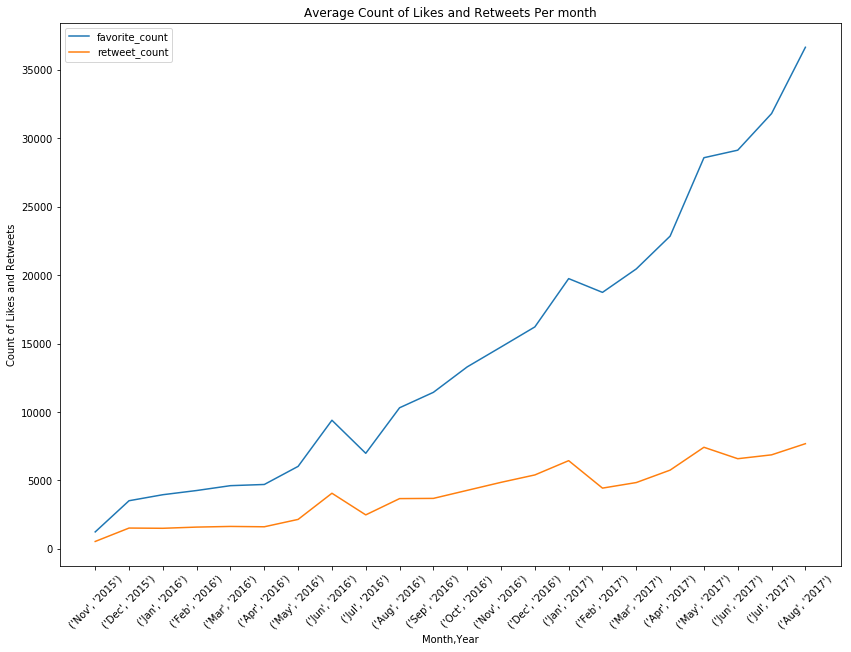

In [46]:
group_tweet = tweet_df.groupby(['year', 'month']).mean()[['favorite_count','retweet_count']].reset_index()
group_tweet = group_tweet.drop(index = [0,1,2,3,4,5,6,7,8,9]).reset_index(drop= True)
group_tweet = group_tweet.drop(index = [22,23,24,25]).reset_index(drop= True)

label = [(i,j) for i,j in zip(group_tweet['month'], group_tweet['year'])]
ax = group_tweet.plot(figsize= (14,10), kind= 'line')
ax.set_ylabel('Count of Likes and Retweets')
ax.set_xlabel('Month,Year')
ax.set_title('Average Count of Likes and Retweets Per month')
ax.set_xticks(range(len(group_tweet['year'])))
ax.set_xticklabels(labels= label)

x = plt.gca().xaxis        # rotates the x-axis tick label 45 degree.
for item in x.get_ticklabels():
    item.set_rotation(45)